In [ ]:
from PIL import Image
import dask.dataframe as dd
import os
import pydicom as dicom

from tensorflow import keras

from keras import Sequential
from keras.layers import Dense, Flatten, Conv3D, Conv2D, MaxPooling3D
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys

## GPU Information

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)
  #For GPU tunning

Fri Apr 26 21:34:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')
  #FOR ram tunning

Your runtime has 31.6 gigabytes of available RAM

You are using a high-RAM runtime!


## Data Retreival

In [ ]:
X = np.load('/content/silvia_cache/X.npy')
y = np.load('/content/silvia_cache/y.npy')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=17)
del X
del y
y_train_onehot, y_val_onehot, y_test_onehot = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)

display(X_train.shape)
display(y_train.shape)
display(y_train_onehot.shape)
display(X_val.shape)
display(y_val.shape)
display(y_val_onehot.shape)
display(X_test.shape)
display(y_test.shape)
display(y_test_onehot.shape)

(12249, 256, 256)

(12249,)

(12249, 3)

(4083, 256, 256)

(4083,)

(4083, 3)

(4084, 256, 256)

(4084,)

(4084, 3)

In [ ]:
from keras.models import load_model
import pickle

In [ ]:
model_parnet = load_model('/content/silvia_cache/model_parnet_7epochs.model')

In [ ]:
loss_parnet, accuracy_parnet = model_parnet.evaluate(
    X_test,
    y_test_onehot,
    batch_size=1,
    verbose=1
)

4084/4084 [==============================] - 45s 10ms/step - loss: 0.4511 - accuracy: 0.8989


In [ ]:
model_resnext = load_model('/content/silvia_cache/model_resnext_2.model')

In [ ]:
loss_resnext, accuracy_resnext = model_resnext.evaluate(
    X_test,
    y_test_onehot,
    batch_size=1,
    verbose=1
)

4084/4084 [==============================] - 40s 9ms/step - loss: 1.3147 - accuracy: 0.3472


In [ ]:
model_vgg16 = load_model('/content/silvia_cache/model_vgg16.model')

In [ ]:
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(
    X_test,
    y_test_onehot,
    batch_size=1,
    verbose=1
)

4084/4084 [==============================] - 43s 10ms/step - loss: 1.0178 - accuracy: 0.5367


In [ ]:
model_resnet = load_model('/content/silvia_cache/model_resnet50.model')

In [ ]:
loss_resnet, accuracy_resnet = model_resnet.evaluate(
    X_test,
    y_test_onehot,
    batch_size=1,
    verbose=1
)

4084/4084 [==============================] - 49s 12ms/step - loss: 1.1562 - accuracy: 0.5960


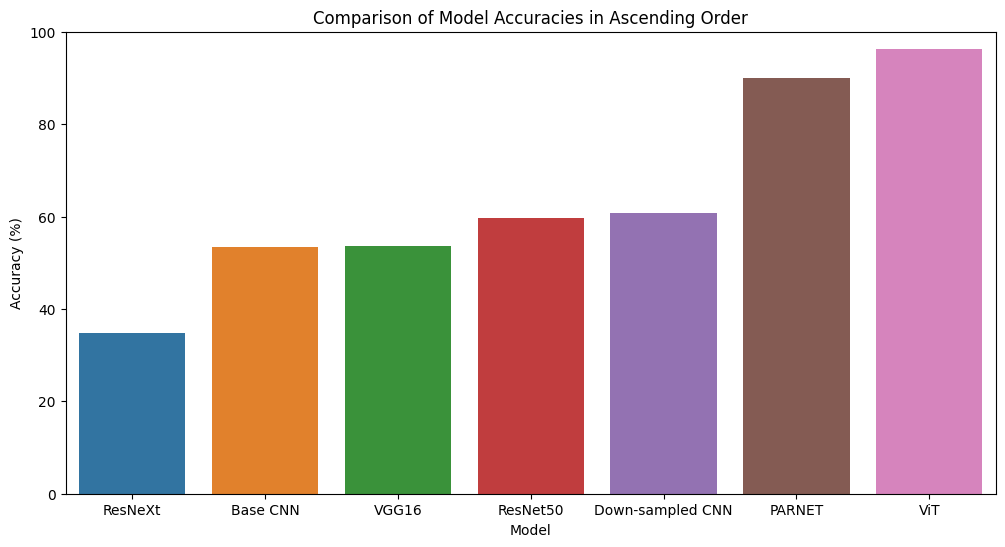

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Actual accuracies
data = {
    'Model': ['PARNET', 'ResNeXt', 'VGG16', 'ResNet50', 'ViT', 'Base CNN', 'Down-sampled CNN'],
    'Accuracy': [89.89, 34.72, 53.67, 59.60, 96.30, 53.40, 60.82]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Sort by Accuracy
df_sorted = df.sort_values(by='Accuracy')

# Assigning each model a color
df_sorted['Color'] = ['blue', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow']

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', hue='Color', data=df_sorted, dodge=False)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies in Ascending Order')
plt.ylim(0, 100)  # Set y-axis limits to cover the range from 0 to 100%
plt.legend().remove()  # Remove the legend
plt.show()


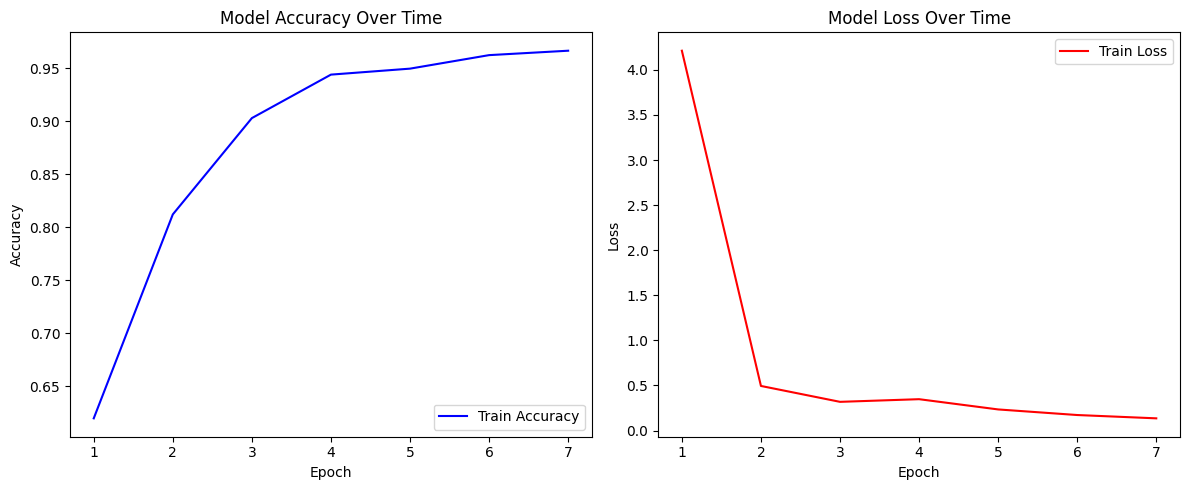

In [3]:
import pickle
import matplotlib.pyplot as plt

# Function to load training history
def load_history(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

# Load training histories
history1 = load_history('model_history1.pkl')
history2 = load_history('model_history.pkl')

# Function to concatenate the metrics from both histories
def concat_histories(key, hist1, hist2):
    # Use list addition and get the values from dictionaries, defaulting to empty lists if key not found
    return hist1.get(key, []) + hist2.get(key, [])

# Concatenate data
accuracy = concat_histories('accuracy', history1, history2)
val_accuracy = concat_histories('val_accuracy', history1, history2)
loss = concat_histories('loss', history1, history2)
val_loss = concat_histories('val_loss', history1, history2)

# Calculate epoch numbers for plotting
epochs = list(range(1, len(accuracy) + 1))

# Create subplot for accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs, accuracy, label='Train Accuracy', color='blue')
if val_accuracy:
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='green')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Create subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs, loss, label='Train Loss', color='red')
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', color='purple')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()
